In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [4]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [5]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [6]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x326d8b350>>


In [7]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['weighted_avg_qb_rating', 'Current_PFF', 'weighted_avg_grades_pass', 'weighted_avg_big_time_throws', 'Value_cap_space', 'weighted_avg_sack_percent', 
                'weighted_avg_twp_rate', 'Current_AV']]
  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Net EPA']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [8]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[102.          77.9         75.7         13.          11.43995749
     6.8          3.4         15.        ]
  [ 90.24605873  61.55811437  60.39690881   7.38485317   0.61049445
     6.34945904   4.5137558   11.        ]
  [ 98.48080808  72.55151515  71.13686869   8.9040404   17.8630137
     5.69292929   4.5530303   15.        ]]

 [[ 84.07037572  64.65390173  64.42196532  18.1734104    7.39638682
     6.93106936   3.44566474   9.        ]
  [ 86.73453237  64.11294964  62.75971223  13.45323741   8.06760848
     5.36115108   4.44748201  10.        ]
  [ 76.22885714  65.11014286  61.79014286  11.71285714   6.39452055
     8.79271429   3.56214286  10.        ]]

 [[ 75.65215577  60.80876217  60.30166898  15.24617524   9.24017003
     7.04255911   4.6108484    8.        ]
  [ 85.51304985  69.71950147  68.8627566   11.97653959   0.61049445
     7.33343109   3.53695015  10.        ]
  [106.62876304  88.60789866  88.10163934  32.80923994   5.34794521
     8.71892697   2.4         15.        

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [10]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [11]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0059
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0053
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0051
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.0057
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0063
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0044
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0058
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.0058
Epoch 16/100
4/

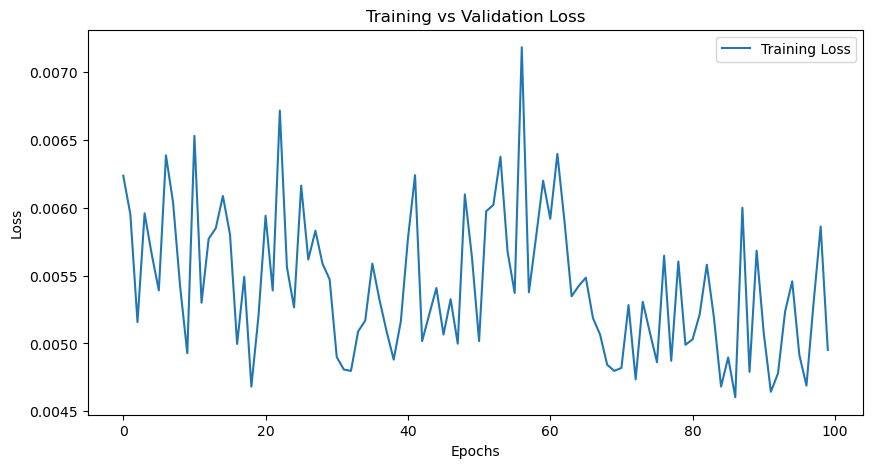

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.4569


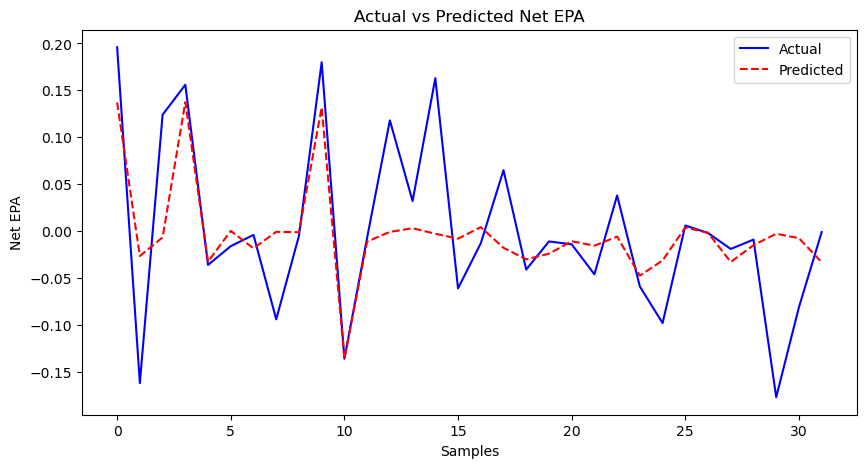

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.0071
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0048
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.0051
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.0047
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.0048
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031    
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0063
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.0059
Epoch 15/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045
Epoch 16/150
4/

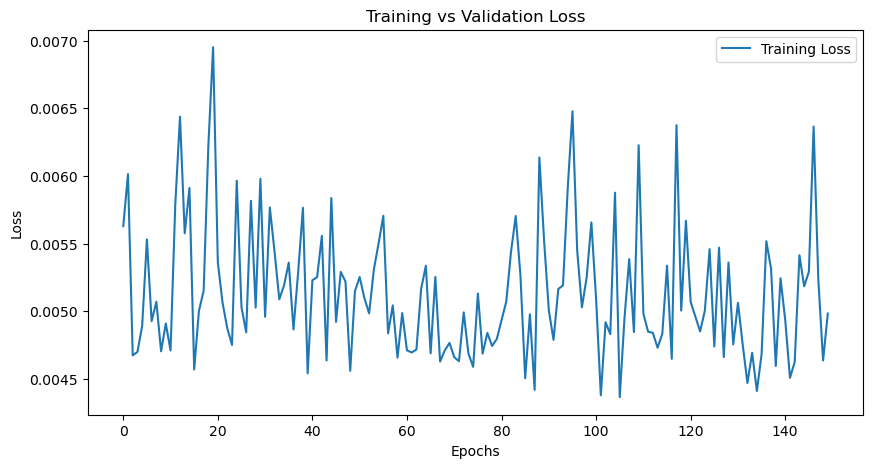

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.4789


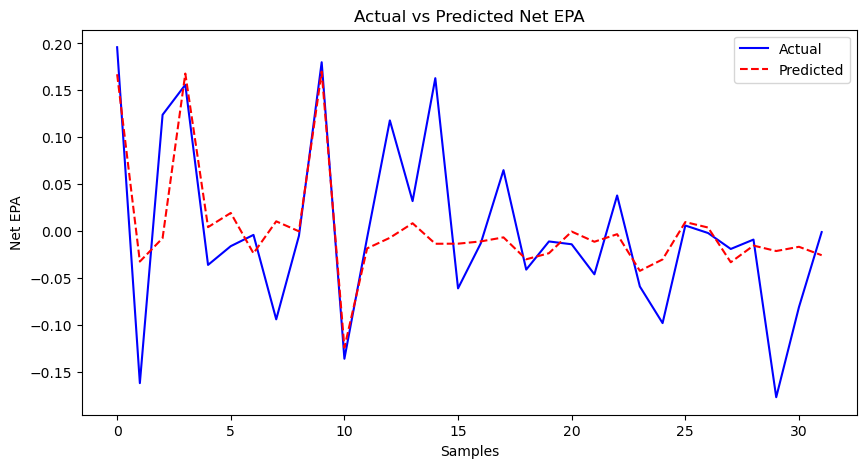

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0050 
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.0049
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0054
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0035  
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0042
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.0051
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.0058
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.0065
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.0040
Epoch 16/200
4/

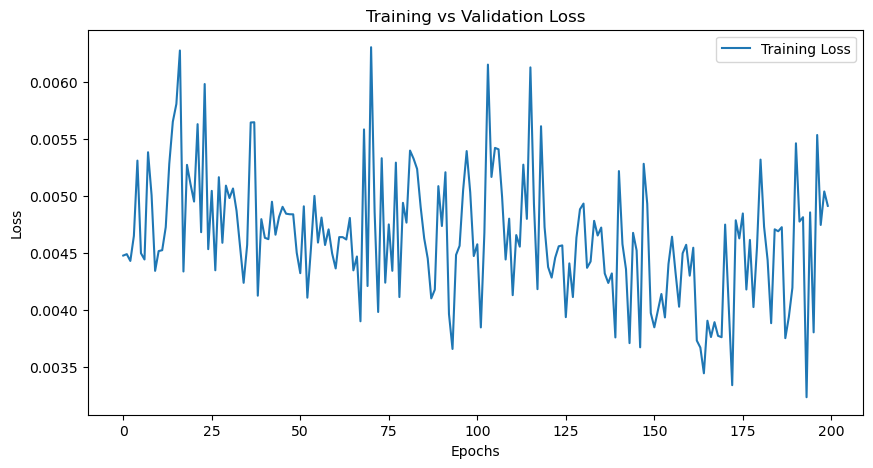

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R² Score: 0.4612


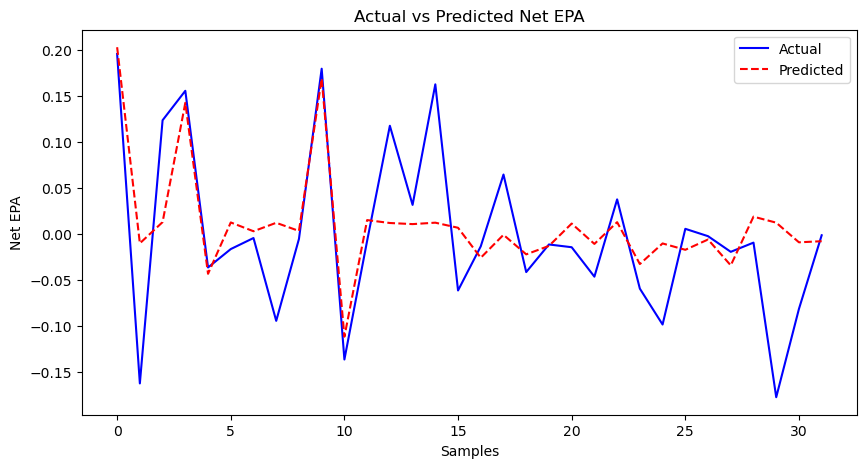

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 0.0046
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0051
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.0055
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.0047
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.0033
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.0032  
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037    
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034
Epoch 16/250
4/4 

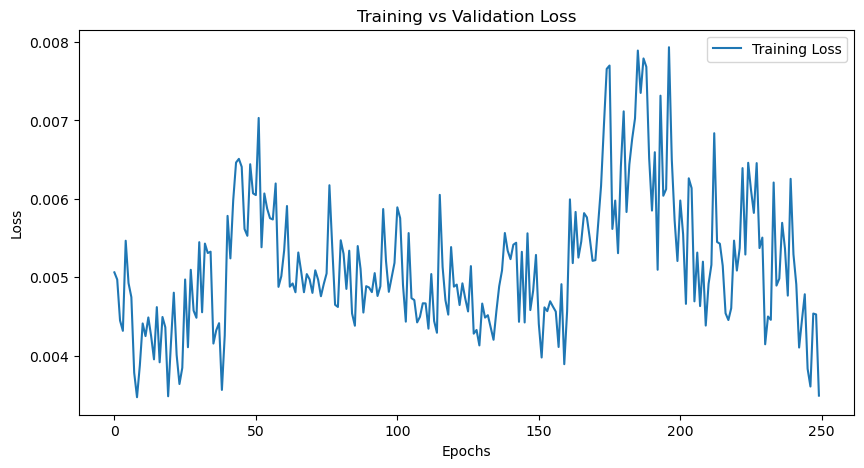

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.5152


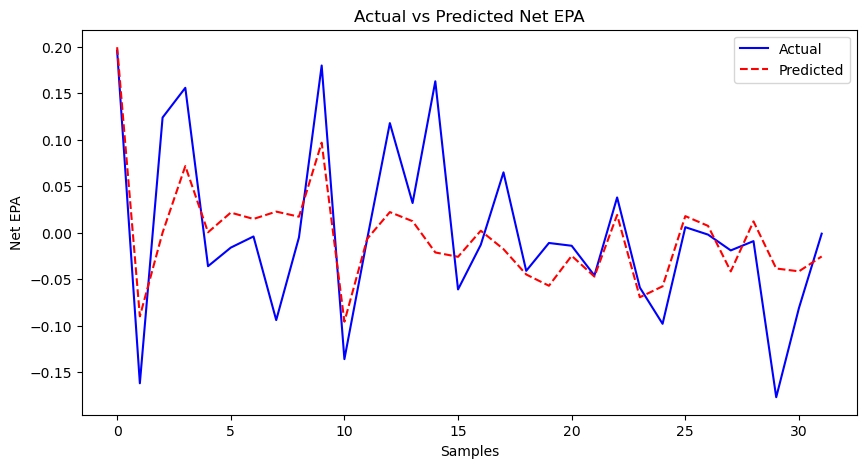

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0047 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.0045
Epoch 16/500
4/4 ━━

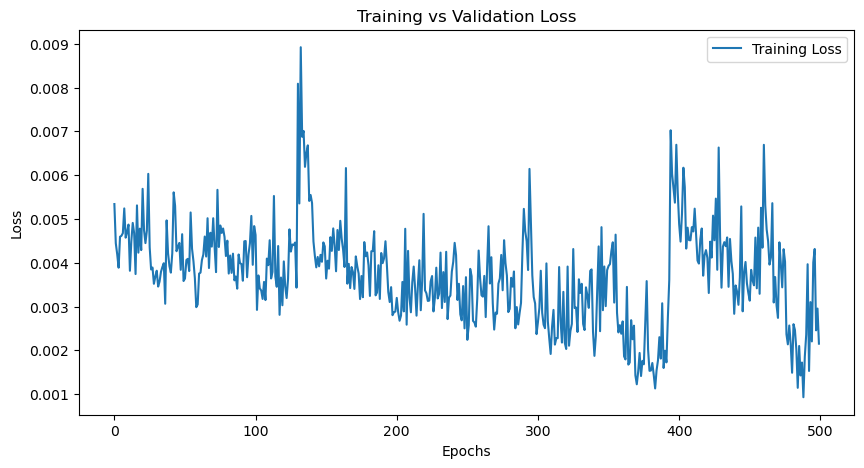

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
R² Score: 0.7464


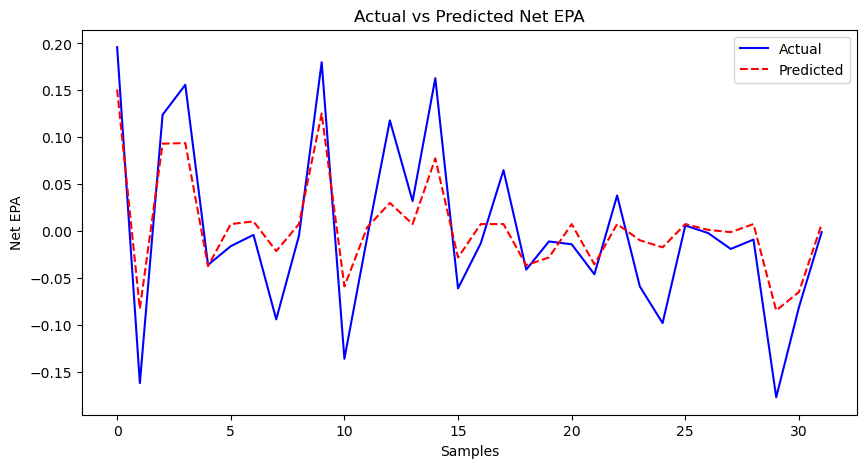

In [15]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [100, 150, 200, 250, 500]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Net EPA')
    plt.xlabel('Samples')
    plt.ylabel('Net EPA')
    plt.legend()
    plt.show()



